In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('./datasets/Online Retail.csv')

In [3]:
df.shape

(541909, 8)

In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/11 12:50,4.95,12680.0,France


In [6]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
df['Quantity'].isnull().sum()

0

In [8]:
df['Quantity'].value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [16]:
df = df.loc[df['Quantity']>0]

In [18]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null object
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
Sales          531285 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 40.5+ MB


In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null datetime64[ns]
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
Sales          531285 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.5+ MB


### RFM (Recency,Frequency,Monetary) Analysis

### Monetary

In [25]:
monetary = df.groupby('CustomerID').Sales.sum()
monetary = monetary.reset_index()

In [27]:
monetary.head()
monetary.shape

(4339, 2)

### Frequency

In [28]:
frequency = df.groupby('CustomerID').InvoiceNo.count()
frequency = frequency.reset_index()

In [29]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Merge monetary and frequency 

In [31]:
master = monetary.merge(frequency,on='CustomerID')
master.head()

,CustomerID,Sales,InvoiceNo
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency

In [41]:
maximum = max(df.InvoiceDate)
maximum

Timestamp('2011-12-10 17:19:00')

In [42]:
maximum = maximum + pd.DateOffset(days = 1)

In [43]:
maximum

Timestamp('2011-12-11 17:19:00')

In [44]:
df['Diff'] = maximum - df.InvoiceDate

In [46]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Diff
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,90 days 04:29:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,90 days 04:29:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,90 days 04:29:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,90 days 04:29:00
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,14.85,90 days 04:29:00


In [47]:
recency = df.groupby('CustomerID').Diff.min()
recency = recency.reset_index()

In [48]:
recency.head()

,CustomerID,Diff
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


In [49]:
# RFM Combined DataFrame
RFM = master.merge(recency,on = 'CustomerID')

In [51]:
RFM.columns = ['CustomerID','monetery','frequency','recency']

In [52]:
RFM.head()

,CustomerID,monetery,frequency,recency
0,12346.0,77183.60,1,327 days 07:18:00
1,12347.0,4310.00,182,41 days 04:54:00
2,12348.0,1797.24,31,77 days 04:06:00
3,12349.0,1757.55,73,20 days 07:28:00
4,12350.0,334.40,17,312 days 01:18:00


In [53]:
RFM.recency = RFM.recency.dt.days

In [54]:
RFM.head()

,CustomerID,monetery,frequency,recency
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
std = StandardScaler()
RFM1 = std.fit_transform(RFM[['monetery','frequency','recency']])

In [59]:
type(RFM1)

numpy.ndarray

In [60]:
# Apply Kmeans with some K
from sklearn.cluster import KMeans

In [61]:
distance = []
for num in list(range(1,21)):
    model = KMeans(n_clusters=num)
    ypred = model.fit_predict(RFM1)
    distance.append(model.inertia_)

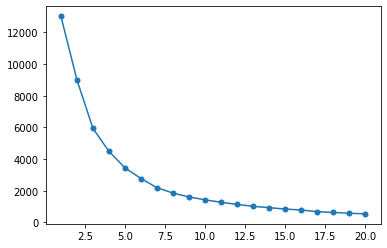

In [63]:
plt.plot(list(range(1,21)),distance,marker='o',ms = 5)
plt.show()

In [64]:
# Kmeans with k = 5
model = KMeans(n_clusters=5)
ypred = model.fit_predict(RFM1)

In [65]:
ypred

array([0, 1, 1, ..., 4, 0, 1], dtype=int32)

In [88]:
RFM['ClusterID'] = ypred

In [89]:
RFM.head()

,CustomerID,monetery,frequency,recency,ClusterID
0,12346.0,77183.60,1,327,0
1,12347.0,4310.00,182,41,1
2,12348.0,1797.24,31,77,1
3,12349.0,1757.55,73,20,1
4,12350.0,334.40,17,312,4


In [106]:
RFM['ClusterID'].value_counts()
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM,pd.Series([0,1,2,3,4])],axis = 1)

In [107]:
km_sales = pd.DataFrame(RFM.groupby('ClusterID').monetery.mean())
km_freq = pd.DataFrame(RFM.groupby('ClusterID').frequency.mean())
km_recency = pd.DataFrame(RFM.groupby('ClusterID').recency.mean())


In [108]:
df1 = pd.concat([pd.Series([0,1,2,3,4]),km_sales,km_freq,km_recency],axis = 1)

In [110]:
df1.columns = ['ClusterID','Sales Mean','Frequency Mean','Recency Mean']

In [111]:
df1

,ClusterID,Sales Mean,Frequency Mean,Recency Mean
0,0,11965.066446,485.206612,24.016529
1,1,1350.483019,73.075869,53.588904
2,2,70925.287500,5807.750000,5.000000
3,3,190863.461667,827.833333,22.833333
4,4,498.935809,30.742466,269.856621


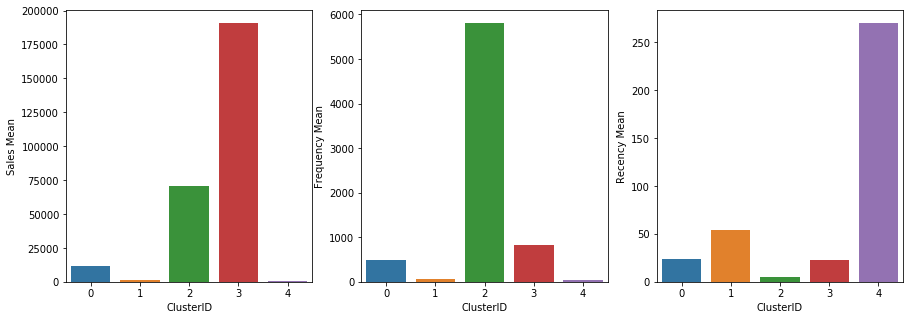

In [112]:
fig,axs = plt.subplots(1,3,figsize = (15,5))
sns.barplot(x = df1.ClusterID,y = df1['Sales Mean'],ax = axs[0])
sns.barplot(x = df1.ClusterID,y = df1['Frequency Mean'],ax = axs[1])
sns.barplot(x = df1.ClusterID,y = df1['Recency Mean'],ax = axs[2])
plt.show()